In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('aac_shelter_outcomes.csv')

In [3]:
data

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
78251,1 month,A764894,Dog,Golden Retriever/Labrador Retriever,Brown/White,2017-12-04T00:00:00,2018-02-01T18:26:00,2018-02-01T18:26:00,NaN,Foster,Adoption,Spayed Female
78252,3 years,A764468,Dog,Mastiff Mix,Blue/White,2014-12-30T00:00:00,2018-02-01T18:06:00,2018-02-01T18:06:00,Max,NaN,Adoption,Neutered Male
78253,NaN,A766098,Other,Bat Mix,Brown,2017-02-01T00:00:00,2018-02-01T18:08:00,2018-02-01T18:08:00,NaN,Rabies Risk,Euthanasia,Unknown
78254,2 months,A765858,Dog,Standard Schnauzer,Red,2017-11-13T00:00:00,2018-02-01T18:32:00,2018-02-01T18:32:00,NaN,NaN,Adoption,Spayed Female


In [4]:
from datetime import datetime
from datetime import timedelta


In [5]:
data.isna().sum()

age_upon_outcome        8
animal_id               0
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
name                23886
outcome_subtype     42293
outcome_type           12
sex_upon_outcome        2
dtype: int64

In [6]:
data = data.drop('monthyear', axis=1)
data.name = data.name.fillna('animal')

In [7]:
def age_(row):
    return (datetime.strptime(row['datetime'], '%Y-%m-%dT%H:%M:%S') \
    - datetime.strptime(row['date_of_birth'], '%Y-%m-%dT%H:%M:%S')).days/365

In [8]:
data['age'] = data.apply(age_, axis=1)
data

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,age
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,animal,Partner,Transfer,Intact Male,0.041096
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1.002740
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1.175342
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9.041096
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,animal,Rabies Risk,Euthanasia,Unknown,0.495890
...,...,...,...,...,...,...,...,...,...,...,...,...
78251,1 month,A764894,Dog,Golden Retriever/Labrador Retriever,Brown/White,2017-12-04T00:00:00,2018-02-01T18:26:00,animal,Foster,Adoption,Spayed Female,0.161644
78252,3 years,A764468,Dog,Mastiff Mix,Blue/White,2014-12-30T00:00:00,2018-02-01T18:06:00,Max,NaN,Adoption,Neutered Male,3.093151
78253,NaN,A766098,Other,Bat Mix,Brown,2017-02-01T00:00:00,2018-02-01T18:08:00,animal,Rabies Risk,Euthanasia,Unknown,1.000000
78254,2 months,A765858,Dog,Standard Schnauzer,Red,2017-11-13T00:00:00,2018-02-01T18:32:00,animal,NaN,Adoption,Spayed Female,0.219178


,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,age
10753,1 year,A671017,Other,Fox Mix,Brown/Black,2013-01-17T00:00:00,2014-01-20T08:27:00,animal,NaN,NaN,Unknown,1.008219
13270,0 years,A674209,Other,Bat Mix,Brown,2014-03-09T00:00:00,2014-03-09T18:15:00,animal,NaN,NaN,Unknown,0.000000
13302,4 weeks,A679066,Other,Rabbit Sh,Brown,2014-04-16T00:00:00,2014-05-16T00:00:00,animal,NaN,NaN,Unknown,0.082192
16951,1 year,A686025,Other,Bat Mix,Brown,2013-08-15T00:00:00,2014-08-16T08:35:00,animal,NaN,NaN,Unknown,1.002740
29214,1 year,A744013,Other,Bat Mix,Black,2016-02-21T00:00:00,2017-02-24T09:00:00,animal,NaN,NaN,Unknown,1.010959
64626,1 month,A755711,Cat,Domestic Shorthair Mix,Black,2017-07-06T00:00:00,2017-08-21T10:09:00,*Dewey,NaN,NaN,Intact Male,0.126027
68246,NaN,A737705,Dog,Labrador Retriever Mix,Black/White,2013-11-02T00:00:00,2016-11-19T16:35:00,*Heddy,NaN,NaN,NaN,3.049315
69847,1 month,A755715,Cat,Domestic Shorthair Mix,Black Smoke,2017-06-29T00:00:00,2017-08-21T10:09:00,*Louie,NaN,NaN,Intact Female,0.145205
72037,1 month,A755716,Cat,Domestic Shorthair Mix,Blue,2017-07-06T00:00:00,2017-08-21T10:09:00,*Huey,NaN,NaN,Intact Female,0.126027
76709,10 years,A718046,Dog,Chihuahua Longhair Mix,Cream,2005-12-20T00:00:00,2016-03-26T00:00:00,Bailey,NaN,NaN,Neutered Male,10.271233


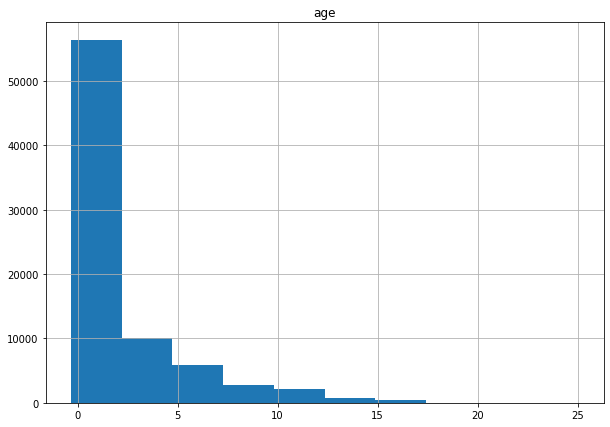

In [9]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [10, 7]
data.hist('age')
data[data.outcome_type.isna() == True]

In [10]:
data = data.dropna(subset=['outcome_type', 'sex_upon_outcome'])
data.outcome_type.isna().sum()
data

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,age
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,animal,Partner,Transfer,Intact Male,0.041096
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1.002740
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1.175342
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9.041096
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,animal,Rabies Risk,Euthanasia,Unknown,0.495890
...,...,...,...,...,...,...,...,...,...,...,...,...
78251,1 month,A764894,Dog,Golden Retriever/Labrador Retriever,Brown/White,2017-12-04T00:00:00,2018-02-01T18:26:00,animal,Foster,Adoption,Spayed Female,0.161644
78252,3 years,A764468,Dog,Mastiff Mix,Blue/White,2014-12-30T00:00:00,2018-02-01T18:06:00,Max,NaN,Adoption,Neutered Male,3.093151
78253,NaN,A766098,Other,Bat Mix,Brown,2017-02-01T00:00:00,2018-02-01T18:08:00,animal,Rabies Risk,Euthanasia,Unknown,1.000000
78254,2 months,A765858,Dog,Standard Schnauzer,Red,2017-11-13T00:00:00,2018-02-01T18:32:00,animal,NaN,Adoption,Spayed Female,0.219178


In [12]:
codes, uniques = pd.factorize(data.outcome_type)
codes1, uniques1 = pd.factorize(data.animal_type)

In [13]:
names = np.array(uniques)
names1 = np.array(uniques1)

In [14]:
data.outcome_type = codes
data.animal_type = codes1

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


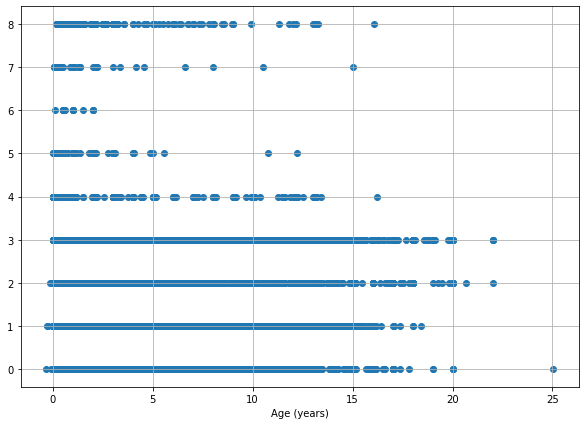

In [15]:
plt.scatter(data.age, data.outcome_type)
plt.xlabel('Age (years)')
plt.grid()
plt.show()

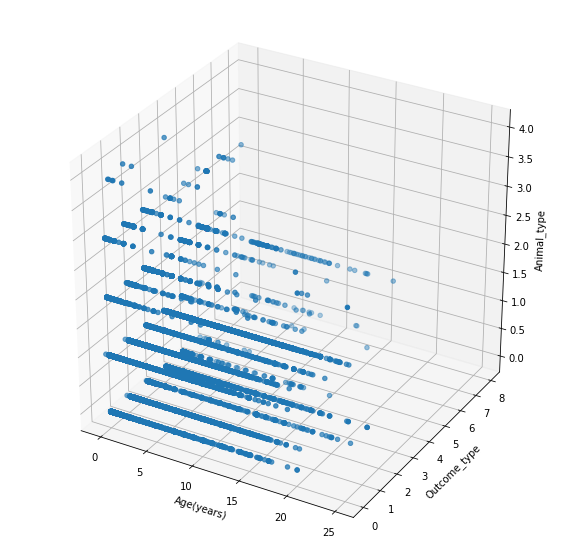

In [16]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(data.age, data.outcome_type, data.animal_type)
ax.set_xlabel('Age(years)')
ax.set_ylabel('Outcome_type')
ax.set_zlabel('Animal_type')
plt.show()

In [11]:
data

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,age
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,animal,Partner,Transfer,Intact Male,0.041096
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1.002740
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1.175342
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9.041096
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,animal,Rabies Risk,Euthanasia,Unknown,0.495890
...,...,...,...,...,...,...,...,...,...,...,...,...
78251,1 month,A764894,Dog,Golden Retriever/Labrador Retriever,Brown/White,2017-12-04T00:00:00,2018-02-01T18:26:00,animal,Foster,Adoption,Spayed Female,0.161644
78252,3 years,A764468,Dog,Mastiff Mix,Blue/White,2014-12-30T00:00:00,2018-02-01T18:06:00,Max,NaN,Adoption,Neutered Male,3.093151
78253,NaN,A766098,Other,Bat Mix,Brown,2017-02-01T00:00:00,2018-02-01T18:08:00,animal,Rabies Risk,Euthanasia,Unknown,1.000000
78254,2 months,A765858,Dog,Standard Schnauzer,Red,2017-11-13T00:00:00,2018-02-01T18:32:00,animal,NaN,Adoption,Spayed Female,0.219178


In [12]:
data.animal_type.unique()

array(['Cat', 'Dog', 'Other', 'Bird', 'Livestock'], dtype=object)

In [13]:
sns.barplot(x=data_cat.breed.value_counts().head(10)/len(data_cat.breed), y=data_cat.breed.value_counts().head(10).index)
plt.show()
# Надо отобрать отдельо собак, кошек, и пр животных

NameError: name 'data_cat' is not defined

In [14]:
data.breed[data.breed.str.contains('Mix') == True]
data.animal_type.loc[(data.animal_type == 'Dog')].count()/len(data.animal_type) + \
data.animal_type.loc[(data.animal_type == 'Cat')].count()/len(data.animal_type)

0.9413749472796289

In [15]:
data.sex_upon_outcome.value_counts()

Neutered Male    27783
Spayed Female    25203
Intact Male       9547
Intact Female     9140
Unknown           6570
Name: sex_upon_outcome, dtype: int64

In [16]:
data_cat = data[data.animal_type == "Cat"]

data_dog = data[data.animal_type == 'Dog']
data_cat

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,age
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,animal,Partner,Transfer,Intact Male,0.041096
8,1 month,A685067,Cat,Domestic Shorthair Mix,Blue Tabby/White,2014-06-16T00:00:00,2014-08-14T18:45:00,Lucy,NaN,Adoption,Intact Female,0.161644
9,3 months,A678580,Cat,Domestic Shorthair Mix,White/Black,2014-03-26T00:00:00,2014-06-29T17:45:00,*Frida,Offsite,Adoption,Spayed Female,0.260274
10,1 year,A675405,Cat,Domestic Medium Hair Mix,Black/White,2013-03-27T00:00:00,2014-03-28T14:55:00,Stella Luna,NaN,Return to Owner,Spayed Female,1.002740
17,3 weeks,A670420,Cat,Domestic Shorthair Mix,Black/White,2013-12-16T00:00:00,2014-01-09T19:29:00,animal,Partner,Transfer,Intact Male,0.065753
...,...,...,...,...,...,...,...,...,...,...,...,...
78231,2 months,A758112,Cat,American Shorthair Mix,Blue Tabby/White,2017-09-14T00:00:00,2017-12-10T17:44:00,Allee Chat,NaN,Adoption,Intact Female,0.238356
78232,1 month,A758569,Cat,Domestic Shorthair Mix,Brown Tabby/White,2017-08-03T00:00:00,2017-09-24T11:57:00,Mia,NaN,Adoption,Intact Male,0.142466
78233,1 year,A765938,Cat,Domestic Shorthair Mix,Brown Tabby,2017-01-30T00:00:00,2018-02-01T17:51:00,animal,Partner,Transfer,Neutered Male,1.005479
78236,6 months,A765832,Cat,Domestic Shorthair Mix,Tortie,2017-07-28T00:00:00,2018-02-01T16:37:00,Luna,NaN,Adoption,Spayed Female,0.515068


In [18]:
top_cats_breeds = data_cat.breed.value_counts().head(10)
top_cats_breeds

Domestic Shorthair Mix      23332
Domestic Medium Hair Mix     2323
Domestic Longhair Mix        1228
Siamese Mix                   998
Domestic Shorthair            386
American Shorthair Mix        211
Snowshoe Mix                  148
Domestic Medium Hair          131
Maine Coon Mix                106
Manx Mix                       79
Name: breed, dtype: int64

In [19]:
data_cat10 = data_cat.groupby('breed').filter(lambda x: len(x) >= top_cats_breeds.min())\
.drop(['animal_type', 'animal_id', 'date_of_birth', 'datetime', 'age_upon_outcome'], axis=1)
data_cat10

,breed,color,name,outcome_subtype,outcome_type,sex_upon_outcome,age
0,Domestic Shorthair Mix,Orange Tabby,animal,Partner,Transfer,Intact Male,0.041096
8,Domestic Shorthair Mix,Blue Tabby/White,Lucy,NaN,Adoption,Intact Female,0.161644
9,Domestic Shorthair Mix,White/Black,*Frida,Offsite,Adoption,Spayed Female,0.260274
10,Domestic Medium Hair Mix,Black/White,Stella Luna,NaN,Return to Owner,Spayed Female,1.002740
17,Domestic Shorthair Mix,Black/White,animal,Partner,Transfer,Intact Male,0.065753
...,...,...,...,...,...,...,...
78231,American Shorthair Mix,Blue Tabby/White,Allee Chat,NaN,Adoption,Intact Female,0.238356
78232,Domestic Shorthair Mix,Brown Tabby/White,Mia,NaN,Adoption,Intact Male,0.142466
78233,Domestic Shorthair Mix,Brown Tabby,animal,Partner,Transfer,Neutered Male,1.005479
78236,Domestic Shorthair Mix,Tortie,Luna,NaN,Adoption,Spayed Female,0.515068


In [20]:
top_20_cat_colors = data_cat.color.value_counts().head(20)
top_20_cat_colors

Brown Tabby           4445
Black                 3846
Black/White           2804
Brown Tabby/White     2338
Orange Tabby          2180
Tortie                1335
Calico                1318
Blue Tabby            1130
Orange Tabby/White    1095
Blue                  1057
Torbie                 845
Blue/White             792
Blue Tabby/White       545
White/Black            508
Cream Tabby            498
Lynx Point             439
White                  334
Seal Point             321
White/Brown Tabby      287
Cream Tabby/White      236
Name: color, dtype: int64

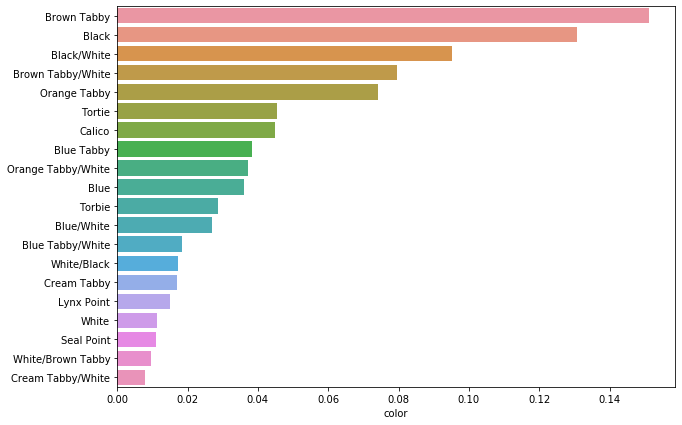

In [21]:
# Оставим топ20 цветов
sns.barplot(x=data_cat.color.value_counts().head(20)/len(data_cat.color), y=data_cat.color.value_counts().head(20).index)
plt.show()

In [22]:
data_cat_col = data_cat10.groupby('color').filter\
(lambda x: len(x) >= top_20_cat_colors.min())
data_cat_col.outcome_subtype = data_cat_col.outcome_subtype.fillna('No matter')
data_cat_col

,breed,color,name,outcome_subtype,outcome_type,sex_upon_outcome,age
0,Domestic Shorthair Mix,Orange Tabby,animal,Partner,Transfer,Intact Male,0.041096
8,Domestic Shorthair Mix,Blue Tabby/White,Lucy,No matter,Adoption,Intact Female,0.161644
9,Domestic Shorthair Mix,White/Black,*Frida,Offsite,Adoption,Spayed Female,0.260274
10,Domestic Medium Hair Mix,Black/White,Stella Luna,No matter,Return to Owner,Spayed Female,1.002740
17,Domestic Shorthair Mix,Black/White,animal,Partner,Transfer,Intact Male,0.065753
...,...,...,...,...,...,...,...
78231,American Shorthair Mix,Blue Tabby/White,Allee Chat,No matter,Adoption,Intact Female,0.238356
78232,Domestic Shorthair Mix,Brown Tabby/White,Mia,No matter,Adoption,Intact Male,0.142466
78233,Domestic Shorthair Mix,Brown Tabby,animal,Partner,Transfer,Neutered Male,1.005479
78236,Domestic Shorthair Mix,Tortie,Luna,No matter,Adoption,Spayed Female,0.515068


In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
breed_tr = encoder.fit_transform(data_cat_col.breed)
color_tr = encoder.fit_transform(data_cat_col.color)
name_tr = encoder.fit_transform(data_cat_col.name)
outcome_subtype_tr = encoder.fit_transform(data_cat_col.outcome_subtype)
outcome_type_tr = encoder.fit_transform(data_cat_col.outcome_type)
sex_upon_outcome_tr = encoder.fit_transform(data_cat_col.sex_upon_outcome)

In [24]:
data_cat_col.breed = breed_tr
data_cat_col.color = color_tr
data_cat_col.name = name_tr
data_cat_col.outcome_subtype = outcome_subtype_tr
data_cat_col.outcome_type = outcome_type_tr
data_cat_col.sex_upon_outcome = sex_upon_outcome_tr
data_cat_col.age = data_cat_col.age.apply(lambda x: round(x, 2))
data_cat_col

,breed,color,name,outcome_subtype,outcome_type,sex_upon_outcome,age
0,5,11,6743,11,7,1,0.04
8,5,4,5221,9,0,0,0.16
9,5,17,1195,10,0,3,0.26
10,3,1,6333,9,5,3,1.00
17,5,1,6743,11,7,1,0.07
...,...,...,...,...,...,...,...
78231,0,4,3683,9,0,0,0.24
78232,5,7,5377,9,0,1,0.14
78233,5,6,6743,11,7,2,1.01
78236,5,15,5230,9,0,3,0.52


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(data_cat_col.drop(['outcome_type'], axis=1), \
                                                    data_cat_col.outcome_type, train_size=0.3)

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier()

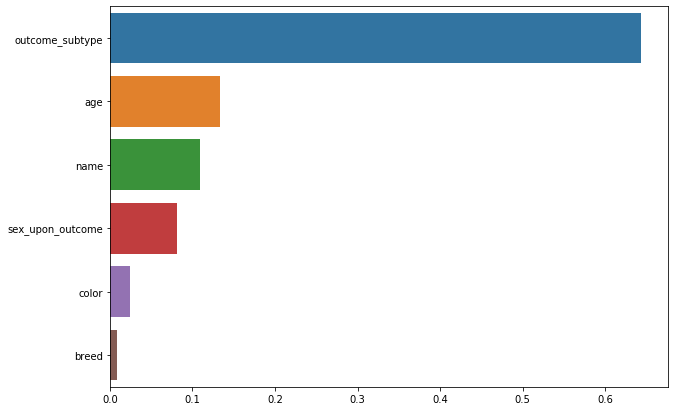

In [37]:
feature_imp = pd.Series(model.feature_importances_, index=x_train.columns.values).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()
# ЧУШЬЬЬ!!!!
# Короче, проверить сбалансированность

In [38]:
model_pred = model.predict(x_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7805
           1       0.88      0.90      0.89       248
           2       0.17      0.25      0.20         8
           3       1.00      0.93      0.96       870
           4       0.00      0.00      0.00        20
           5       0.51      0.35      0.41       820
           6       0.00      0.00      0.00        16
           7       1.00      1.00      1.00      8259

    accuracy                           0.95     18046
   macro avg       0.56      0.55      0.55     18046
weighted avg       0.94      0.95      0.94     18046



In [180]:
data

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,age
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,animal,Partner,Transfer,Intact Male,0.041096
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1.002740
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1.175342
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9.041096
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,animal,Rabies Risk,Euthanasia,Unknown,0.495890
...,...,...,...,...,...,...,...,...,...,...,...,...
78251,1 month,A764894,Dog,Golden Retriever/Labrador Retriever,Brown/White,2017-12-04T00:00:00,2018-02-01T18:26:00,animal,Foster,Adoption,Spayed Female,0.161644
78252,3 years,A764468,Dog,Mastiff Mix,Blue/White,2014-12-30T00:00:00,2018-02-01T18:06:00,Max,NaN,Adoption,Neutered Male,3.093151
78253,NaN,A766098,Other,Bat Mix,Brown,2017-02-01T00:00:00,2018-02-01T18:08:00,animal,Rabies Risk,Euthanasia,Unknown,1.000000
78254,2 months,A765858,Dog,Standard Schnauzer,Red,2017-11-13T00:00:00,2018-02-01T18:32:00,animal,NaN,Adoption,Spayed Female,0.219178


In [51]:
import pandas_profiling as pp
pp.ProfileReport(data_cat_col)

TypeError: concat() got an unexpected keyword argument 'join_axes'